In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

In [ ]:

URL_BASES = "/scratch2/haniel.botelho/eICU/"
patient = "patient.csv"
physicalExam = "physicalExam.csv"
lab = "lab.csv"
infusionDrug = "infusionDrug.csv"
diagnosis = "diagnosis.csv"

url_patient = URL_BASES + patient
url_physicalExam = URL_BASES + physicalExam
url_lab = URL_BASES + lab
url_infusionDrug = URL_BASES + infusionDrug
url_diagnosis = URL_BASES + diagnosis


In [ ]:
df_patient = pd.read_csv(url_patient)

In [ ]:
df_sepsis = df_patient[df_patient['apacheadmissiondx'].str.contains('sepsis', case=False, na=False)]

In [ ]:
df_sepsis.count()

##### contagem

In [ ]:
contagem_por_health_sepsis = df_sepsis.groupby(['uniquepid','patienthealthsystemstayid']).size().reset_index(name='Contagem_health_sepsis')
contagem_por_health_sepsis.sort_values(by='Contagem_health_sepsis',ascending=False).head()

In [ ]:
contagem_por_patient_sepsis = df_sepsis.groupby(['uniquepid']).size().reset_index(name='Contagem_patient_sepsis')
contagem_por_patient_sepsis.sort_values(by='Contagem_patient_sepsis',ascending=False).head()

In [ ]:
contagem = pd.merge(contagem_por_health_sepsis,contagem_por_patient_sepsis,on='uniquepid')
contagem.sort_values(by='Contagem_patient_sepsis',ascending=False).head(300000)

##### physical

In [ ]:
df_physicalExam = pd.read_csv(url_physicalExam)

In [ ]:
df_physicalExam_sepsis = pd.merge(df_sepsis['patientunitstayid'],df_physicalExam,on='patientunitstayid',how='left')

In [ ]:
df_physicalExam.count()

In [ ]:
df_physicalExam_sepsis.count()

In [ ]:

def filter_exam(df, exam_name):
    return df[df['physicalexampath'].str.contains(exam_name, case=False, na=False)].copy()

In [ ]:
def histograma(intervalo,range_, filtro):
    total_exam = []
    df_filtrado = filter_exam(df_physicalExam_sepsis,filtro)
    for i in range(range_):
        total_exam_dia = df_filtrado[(df_filtrado['physicalexamoffset']>=intervalo*i)&(df_filtrado['physicalexamoffset']<=intervalo*(i+1))].shape[0]
        total_exam.append(total_exam_dia)
    return total_exam

In [34]:
exames = ['O2 Sat%','HR','systolic','motor','verbal','eyes']
dados = []
for exam in exames:
    dados.append(histograma(60,24,exam))

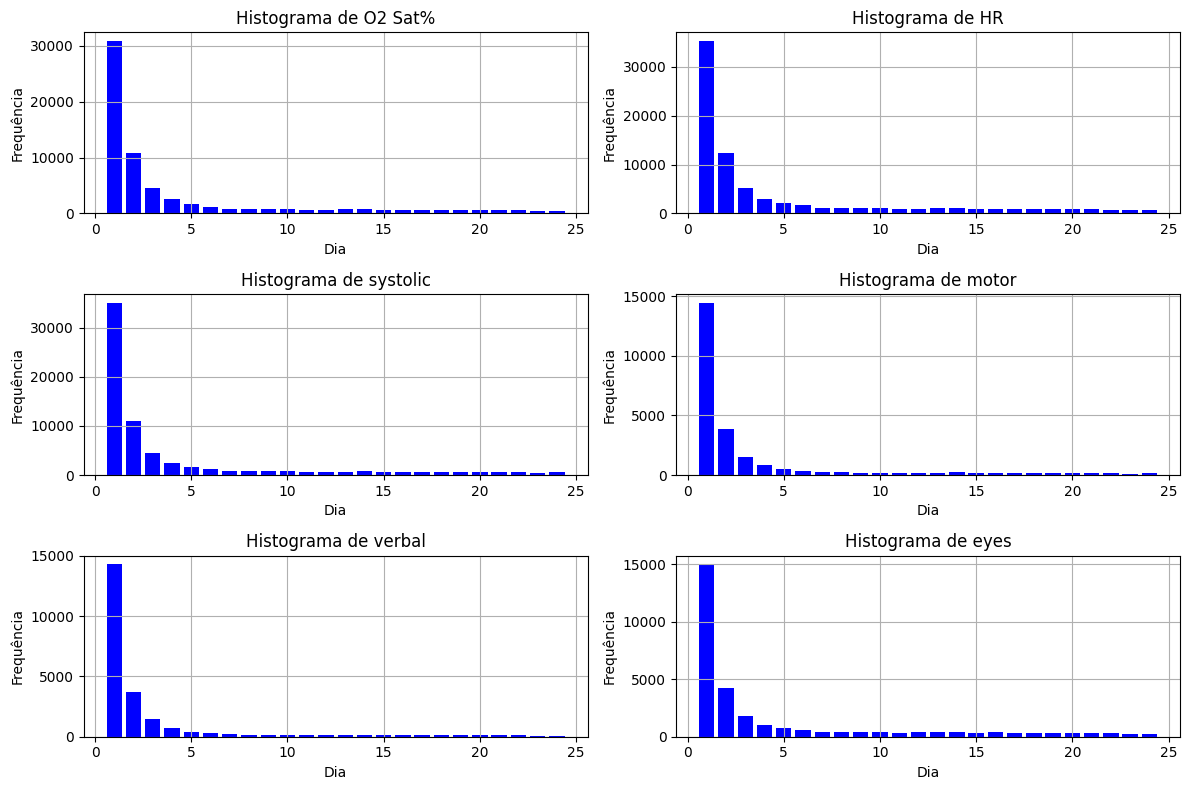

In [35]:
plt.figure(figsize=(12, 8))  # Definindo o tamanho da figura

for i, exam in enumerate(exames):
    plt.subplot(3, 2, i+1)  # Criando subplot para cada exame
    plt.bar(range(1, len(dados[i])+1), dados[i], color='blue')  # Plotando o histograma
    plt.title('Histograma de ' + exam)  # Adicionando um título ao gráfico
    plt.xlabel('Dia')  # Adicionando rótulo ao eixo x
    plt.ylabel('Frequência')  # Adicionando rótulo ao eixo y
    plt.grid(True)  # Adicionando grades ao gráfico

plt.tight_layout()  # Ajustando layout para evitar sobreposição
plt.show()  # Mostrando os gráficos

##### lab

In [25]:
df_lab = pd.read_csv(url_lab)

In [27]:
df_lab_sepsis = pd.merge(df_sepsis['patientunitstayid'],df_lab,on='patientunitstayid',how='left')

In [28]:

def filter_lab(df, lab_name):
    return df[df['labname'].str.contains(lab_name, case=False, na=False)].copy()

In [29]:
def histograma_lab(intervalo,range_, filtro):
    total_exam = []
    df_filtrado = filter_lab(df_lab_sepsis,filtro)
    for i in range(range_):
        total_exam_dia = df_filtrado[(df_filtrado['labresultoffset']>=intervalo*i)&(df_filtrado['labresultoffset']<=intervalo*(i+1))].shape[0]
        total_exam.append(total_exam_dia)
    return total_exam

In [47]:
labs = ['bands', 'CRP', 'ESR', 'temperature', 'WBC',
       'BUN', 'creatinine', 'bicarbonate', 'lactate', 'troponin', 'paO2', 'Respiratory Rate',
       'ALT', 'AST', 'bilirubin', 'Hgb', 'INR', 'platelets',
       'albumin', 'chloride', 'glucose', 'sodium']
dados = []
for lab in labs:
    dados.append(histograma(60*24,5,lab))

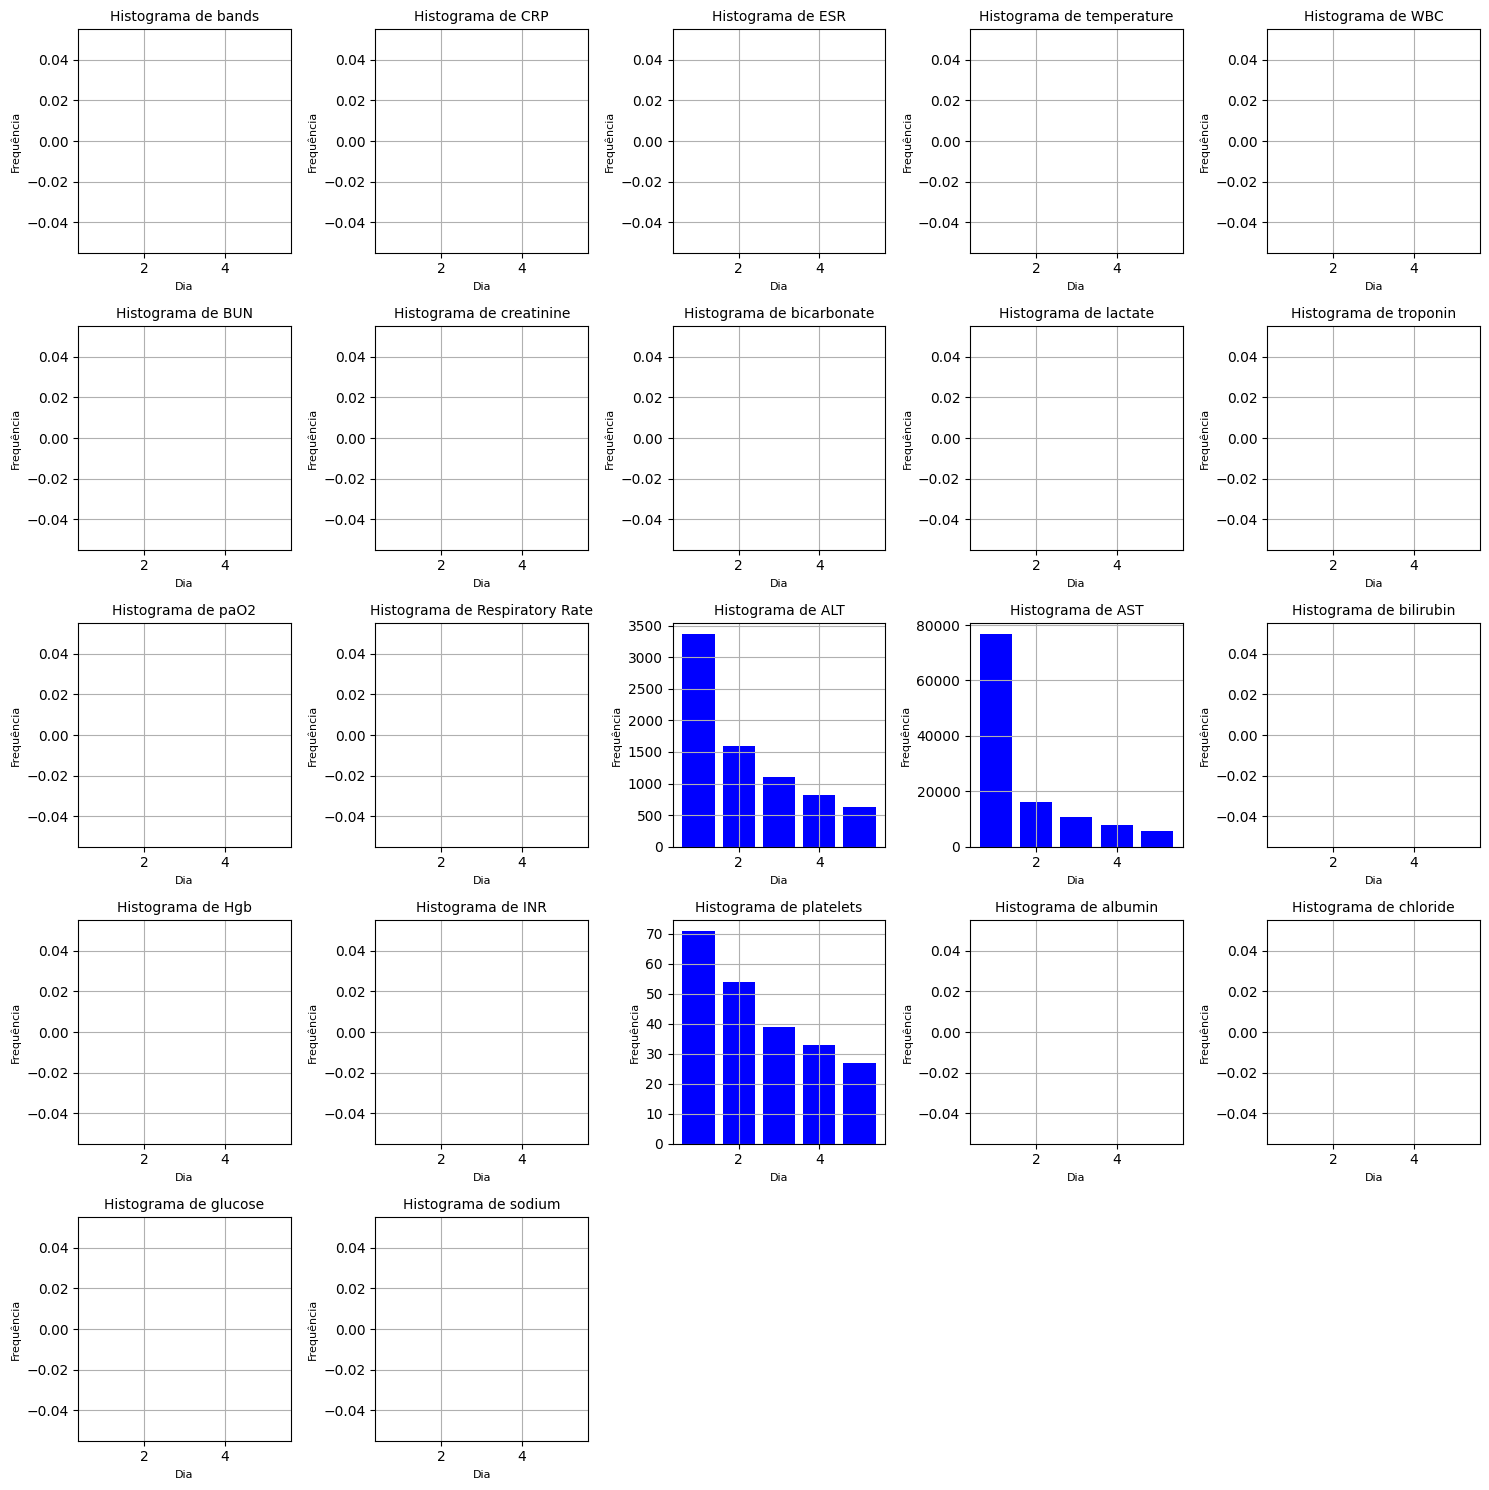

In [48]:
plt.figure(figsize=(15, 15))

num_labs = len(labs)
rows = (num_labs + 4) // 5  # Calcula o número de linhas necessárias para uma grade 5x5

for i, lab in enumerate(labs):
    plt.subplot(5, 5, i + 1)  # Configurando o subplot na grade correta
    plt.bar(range(1, len(dados[i]) + 1), dados[i], color='blue')  # Plotando o histograma
    plt.title(f'Histograma de {lab}', fontsize=10)  # Adicionando o título
    plt.xlabel('Dia', fontsize=8)  # Rótulo do eixo x
    plt.ylabel('Frequência', fontsize=8)  # Rótulo do eixo y
    plt.grid(True)  # Adicionando grades ao gráfico

# Ajustando layout para evitar sobreposição
plt.tight_layout()

# Exibindo os gráficos
plt.show()

##### infusion

##### diagnosis